<font size=5> LTFS Data Science FinHack 3 </font>

The competition aims to build a machine learning classification model to predict 'Top-up Month'. It is nothing but Period/Bucket when a customer took the Top-up loan. It consist of demography data and bureau data. The model evalvation metric is f1-score macro average. The data is quite imbalanced.

A **Top up loan** meaning an extra loan is a financing option that is offered over and above the existing loan amount for products such as home loan and personal loan. The top-up loan is offered to customers who have an existing relationship with the lender, have a good credit score and have repayment ability.

# Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

plt.style.use('seaborn-whitegrid')
pd.set_option.max_columns=100

## Import dataset

In [2]:
def convert_excel_to_csv():
    train = pd.read_excel('input/train_Data.xlsx')
    train.to_csv('input/test_Data.csv',index=False)
    print('train shape',train.shape)
    test = pd.read_excel('input/test_Data.xlsx')
    test.to_csv('input/test_Data.csv',index=False)
    print('test shape',test.shape)
    
    # bureau
    train_br = pd.read_excel('input/train_bureau.xlsx')
    train_br.to_csv('input/train_bureau.csv',index=False)
    print('test shape',train_br.shape)
    test_br = pd.read_excel('input/test_bureau.xlsx')
    test_br.to_csv('input/test_bureau.csv',index=False)
    print('test shape',test_br.shape)

# convert_excel_to_csv()

In [3]:
train = pd.read_csv('input/train_Data.csv')
test = pd.read_csv('input/test_Data.csv')

strf = f"""
train shape {train.shape}
test  shape {test.shape}
"""
print(strf)


train shape (128655, 26)
test  shape (14745, 25)



In [4]:
# # first bench mark
# sub = test[['ID']]
# sub.loc[:,'Top-up Month'] = 'No Top-up Service'
# sub.to_csv('model_preds/submission.csv',index=False)

## Glimse Data

In [5]:
train.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [6]:
test.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,...,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,...,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,...,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,...,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,...,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0


In [7]:
train.nunique()

ID                 128655
Frequency               4
InstlmentMode           2
LoanStatus              2
PaymentMode            11
BranchID              189
Area                   92
Tenure                141
AssetCost            7835
AmountFinance       20439
DisbursalAmount     19412
EMI                 24323
DisbursalDate        2837
MaturityDAte          980
AuthDate             2711
AssetID            128655
ManufacturerID         10
SupplierID           4539
LTV                  7988
SEX                     2
AGE                    73
MonthlyIncome       11568
City                  488
State                  22
ZiPCODE              9123
Top-up Month            7
dtype: int64

In [8]:
train.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [9]:
date_cols = ['AuthDate','DisbursalDate','MaturityDAte']

for c in date_cols:
    train[c] = pd.to_datetime(train[c])

In [10]:
id_col = ['AssetID',"ID"]
date_col = ["DisbursalDate","MaturityDAte",'AuthDate']
cat_col = ['BranchID','ManufacturerID', 'SupplierID','ZiPCODE',"Frequency","InstlmentMode",
           "LoanStatus","PaymentMode","Area","SEX",'City',"State"]
num_col = ['Tenure', 'AssetCost', 'AmountFinance', 'DisbursalAmount', 
           'EMI','LTV', 'AGE', 'MonthlyIncome']

# Exploratory Data Analysis

## Distribution Plot

In [11]:
def num_plot(df,col,target=None,transform=None):
    """
    transform: log,log1p, log10, sqrt, square
    """
    f,ax = plt.subplots(1,2,figsize=(14,6))
    
    dfo = df[df[col].notnull()].reset_index(drop=True)
    # hist
    if transform is None:
        ax[0].hist(dfo[col],bins=50)
    else:
        dfo[col] = dfo[col].apply(transform)
        ax[0].hist(dfo[col],bins=50)
    ax[0].set_title(f'Distribution of {col}')
    
    # box plot
    if target is None:
        sns.boxplot(x=col,data=dfo,ax=ax[1])
    else:
        sns.boxplot(x=col,y=target,data=dfo,ax=ax[1])
    ax[1].set_title(f'Boxen plot of {col}')

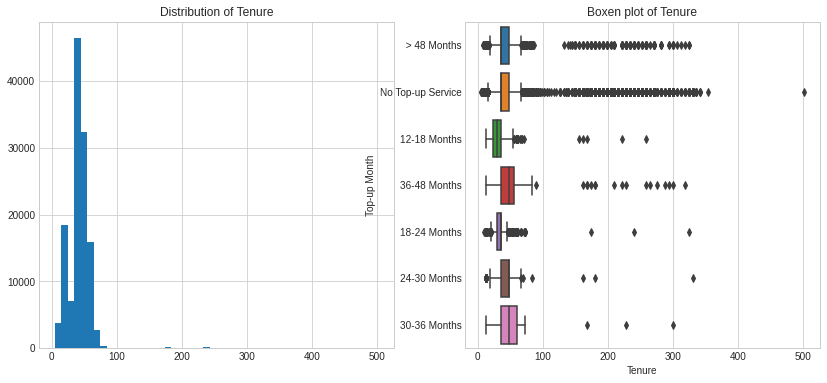

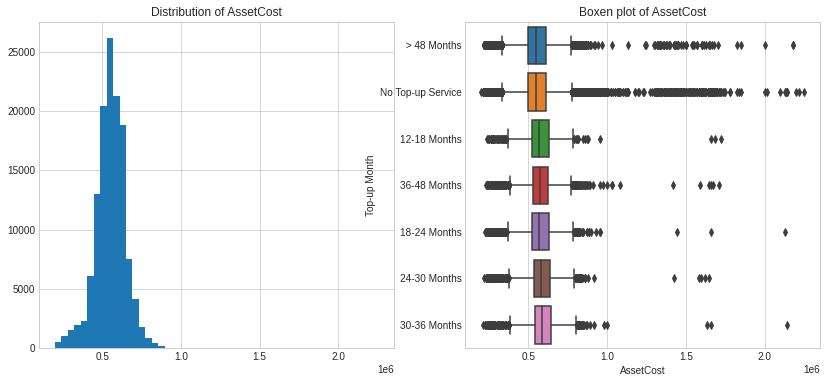

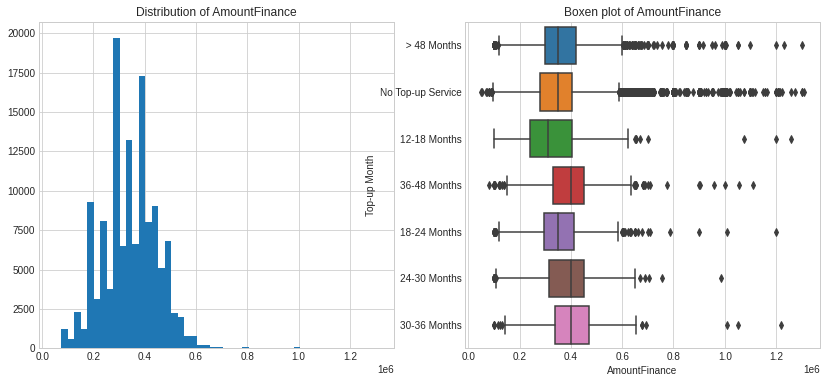

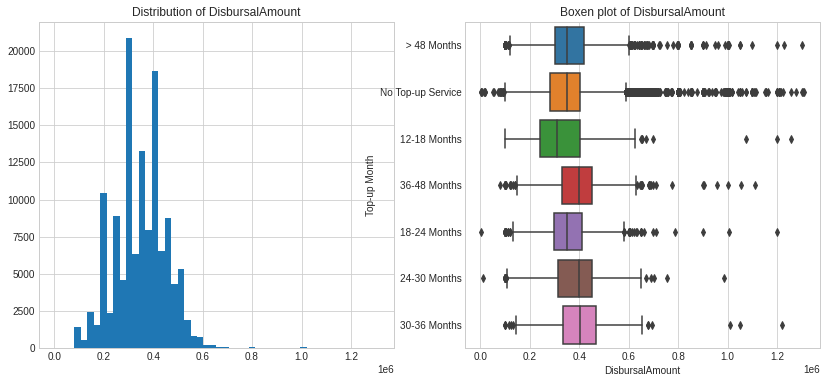

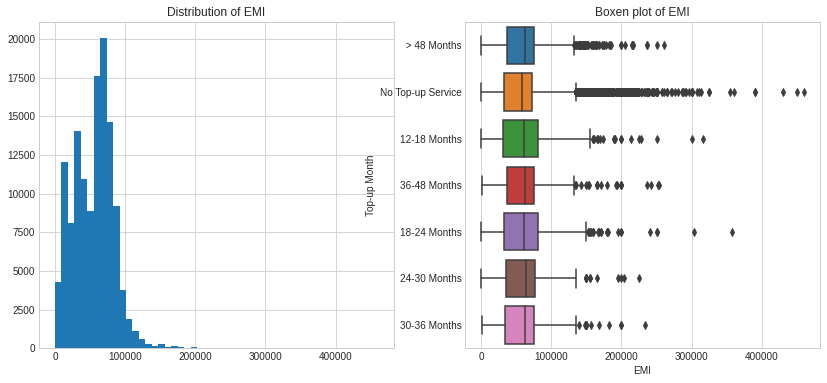

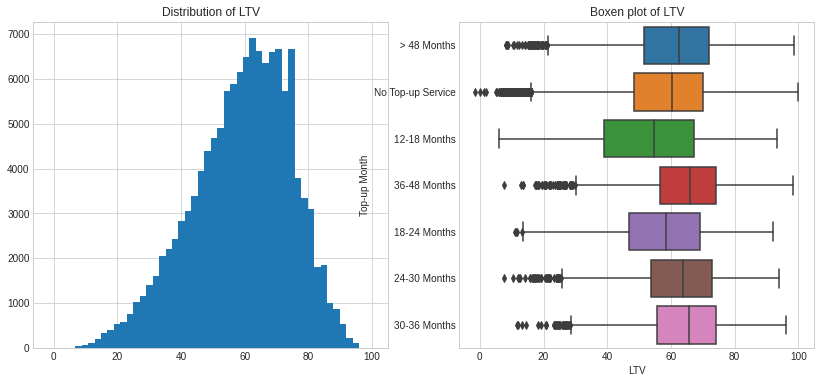

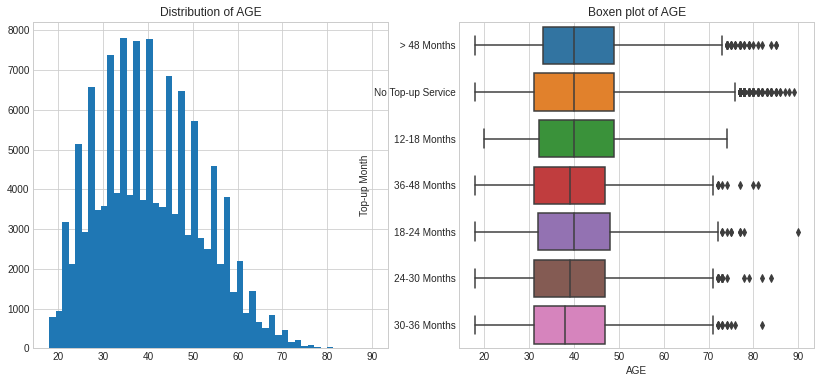

In [12]:
for col in num_col[:-1]:
    num_plot(train,col,'Top-up Month')

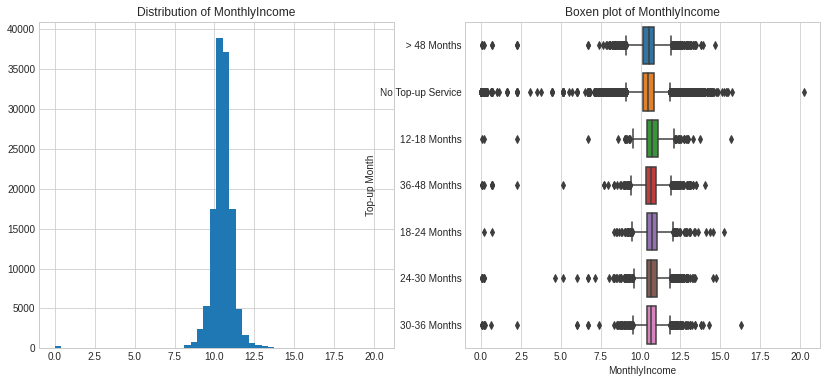

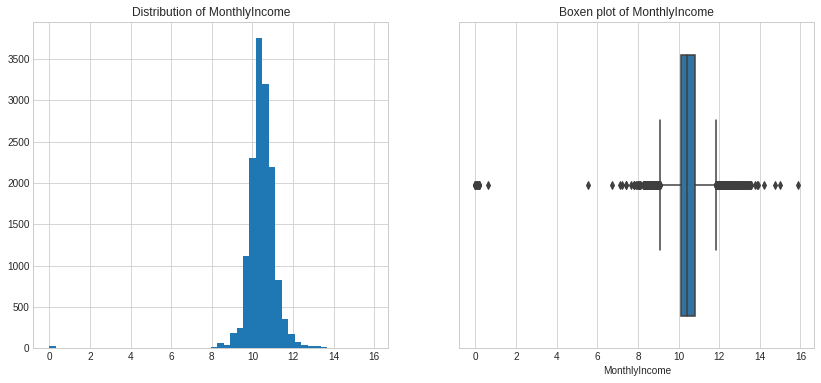

In [13]:
num_plot(train,'MonthlyIncome','Top-up Month','log1p')
num_plot(test,'MonthlyIncome',None,'log1p')

## Categorical Plot

In [14]:
def cat_plot(df,col,topN=20):
    """
    categorical plot
    """
    f,ax = plt.subplots(1,1,figsize=(14,6))
    
    dfo = df[df[col].notnull()].reset_index(drop=True)
    # hist
    tmp = (dfo.groupby([col])
        .agg(cnt=(col,'count'))
        .reset_index()
        .sort_values('cnt',ascending=False)[:topN]
        )
    tmp[col] = tmp[col].astype('str')
    sns.barplot(x=col,y='cnt',data=tmp,ax=ax)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=60)

## Top-up Month

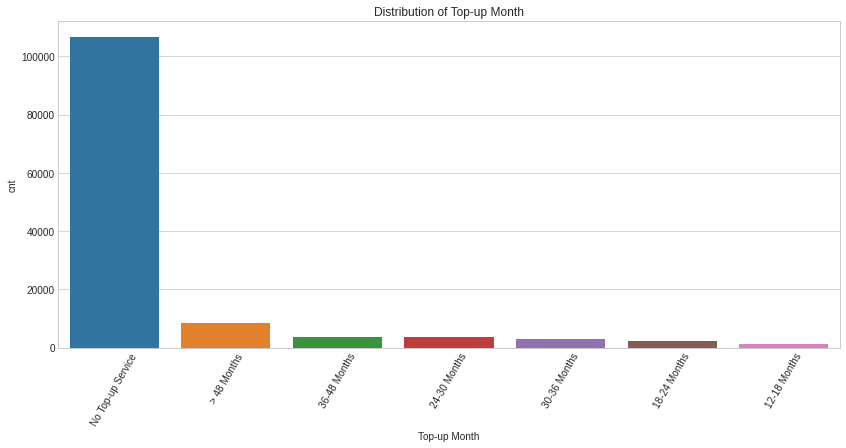

In [15]:
cat_plot(train,'Top-up Month')

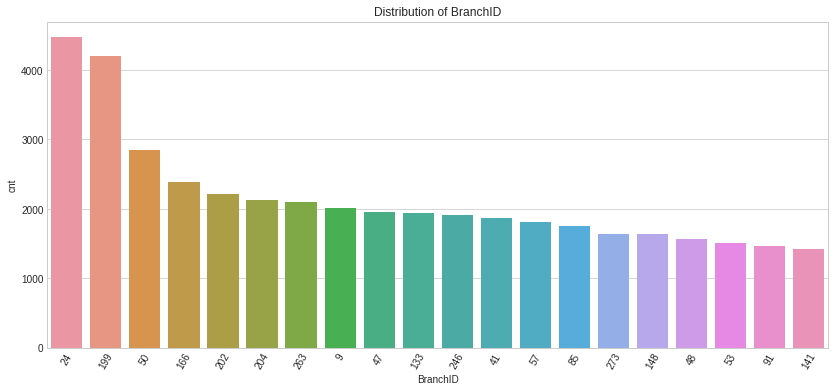

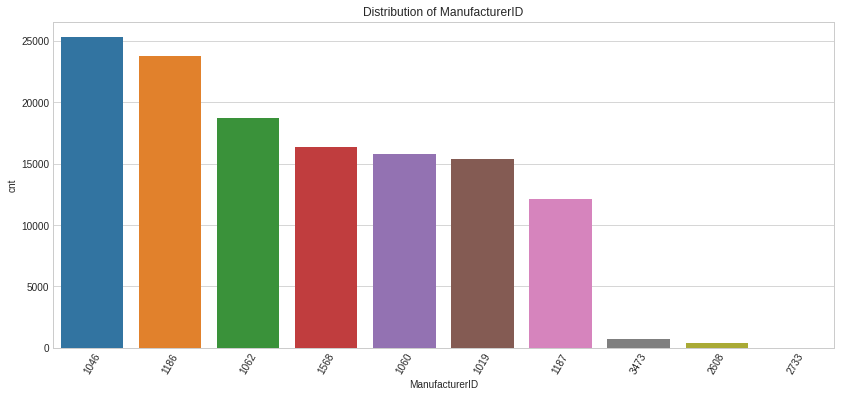

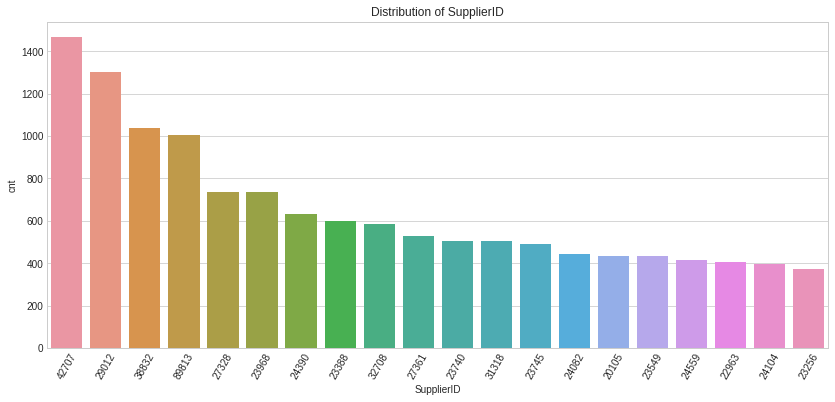

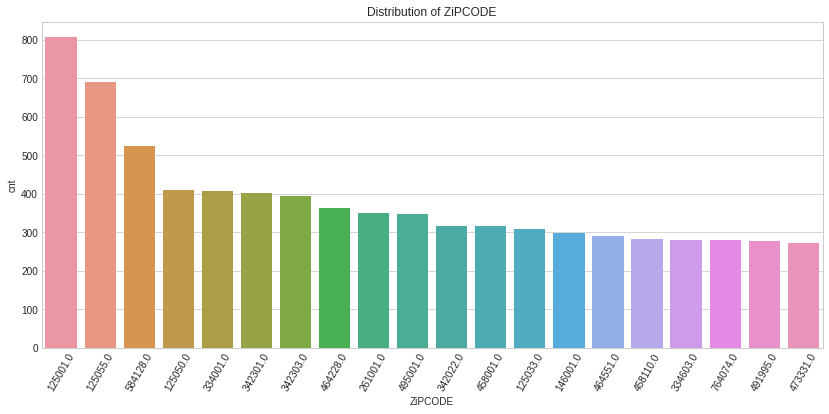

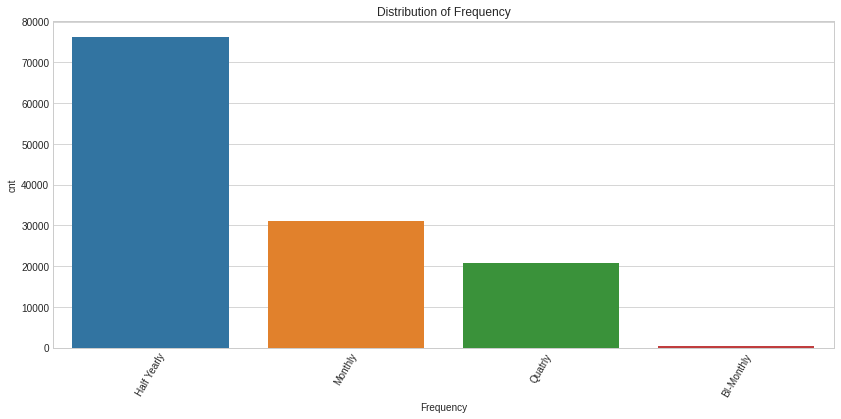

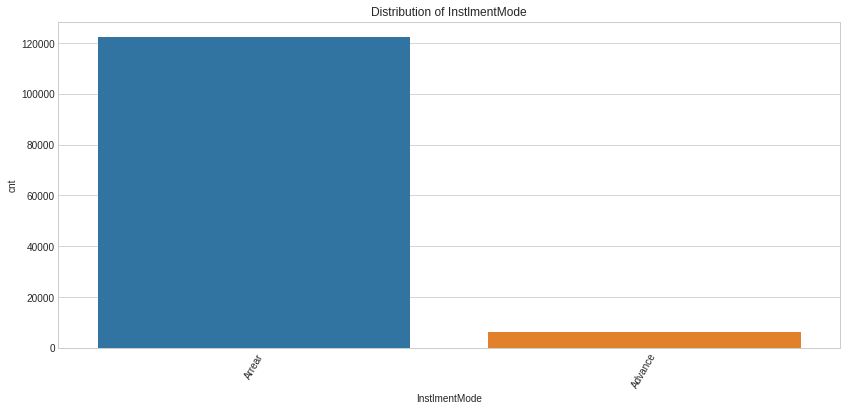

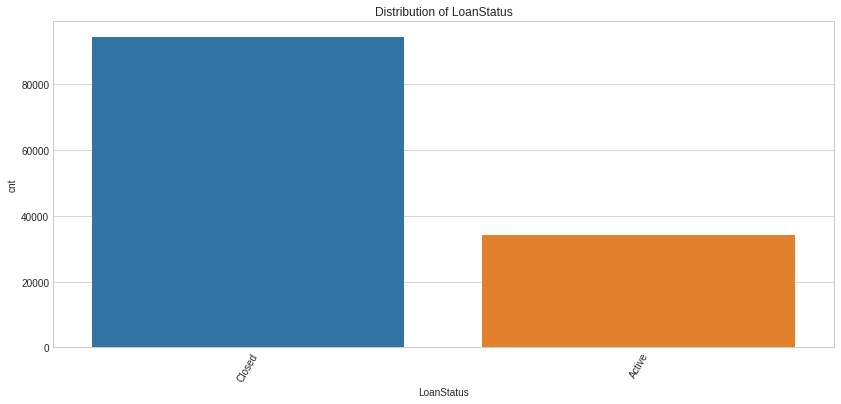

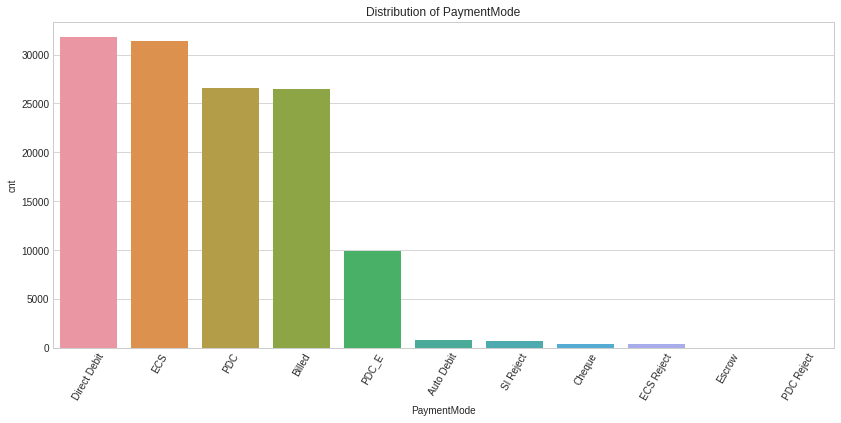

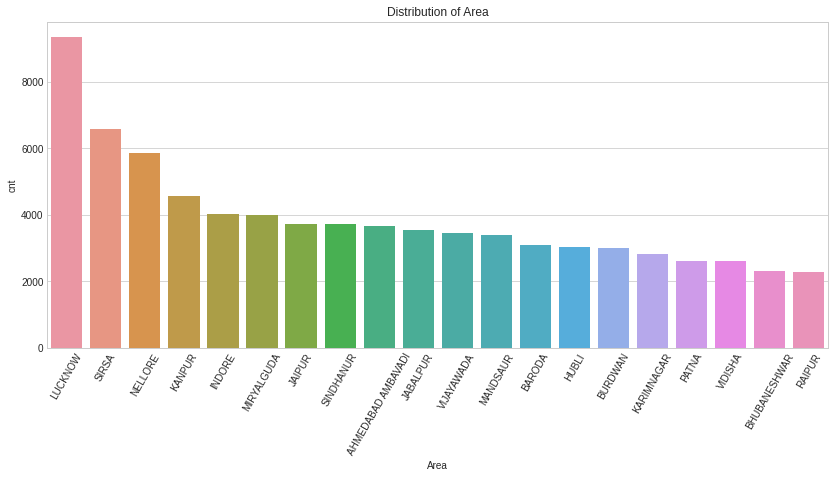

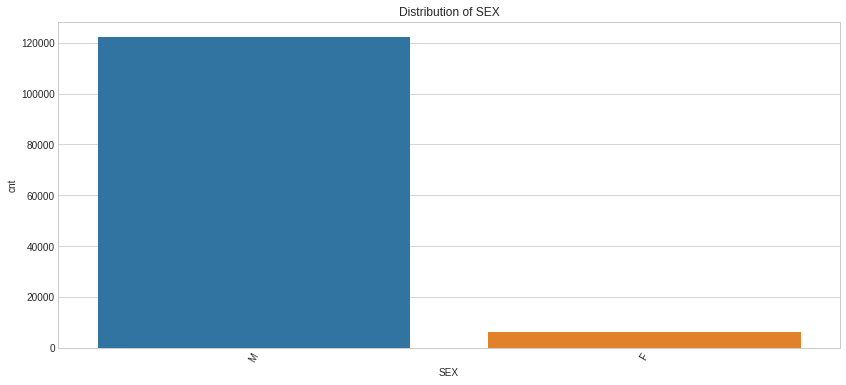

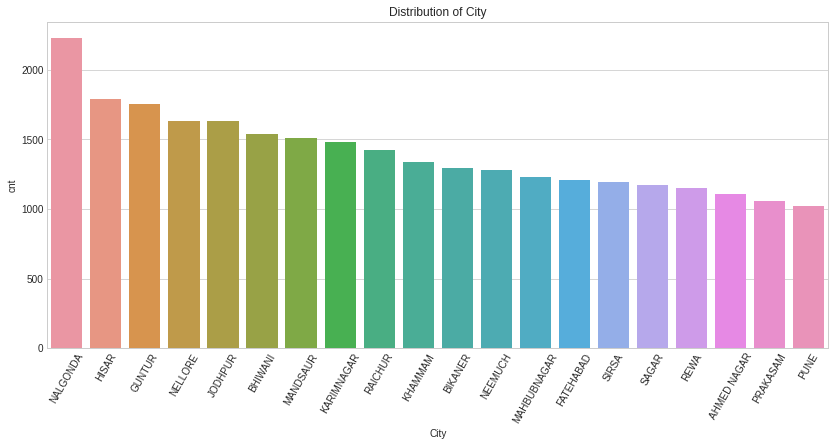

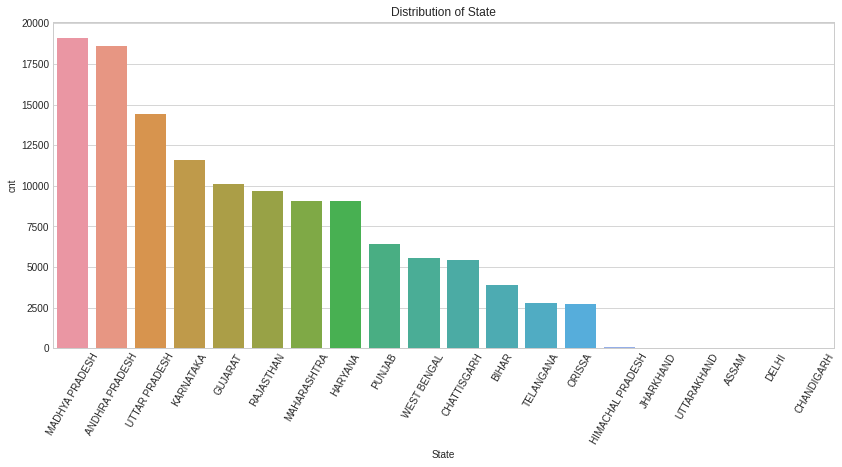

In [15]:
for c in cat_col:
    cat_plot(train,c)

## Missing value

In [16]:
round(train.isnull().mean()*100,2)

ID                 0.00
Frequency          0.00
InstlmentMode      0.00
LoanStatus         0.00
PaymentMode        0.00
BranchID           0.00
Area               9.06
Tenure             0.00
AssetCost          0.00
AmountFinance      0.00
DisbursalAmount    0.00
EMI                0.00
DisbursalDate      0.00
MaturityDAte       0.00
AuthDate           0.00
AssetID            0.00
ManufacturerID     0.00
SupplierID         0.00
LTV                0.00
SEX                0.05
AGE                0.05
MonthlyIncome      0.18
City               8.75
State              0.00
ZiPCODE            0.29
Top-up Month       0.00
dtype: float64

In [17]:
# # fill missing value
# for c in train.columns:
#     if c in num_col:
#         mean = train[c].mean()
#         train[c] = train[c].fillna(mean)
#         test[c] = test[c].fillna(mean)
#     elif c in cat_col:
#         mode = train[c].mode()[0]
#         train[c] = train[c].fillna(mode)
#         test[c] = test[c].fillna(mode)

# Model Features

In [14]:
import joblib
import lightgbm as lgb
model = joblib.load('models/lgbm_0.pkl')

## Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

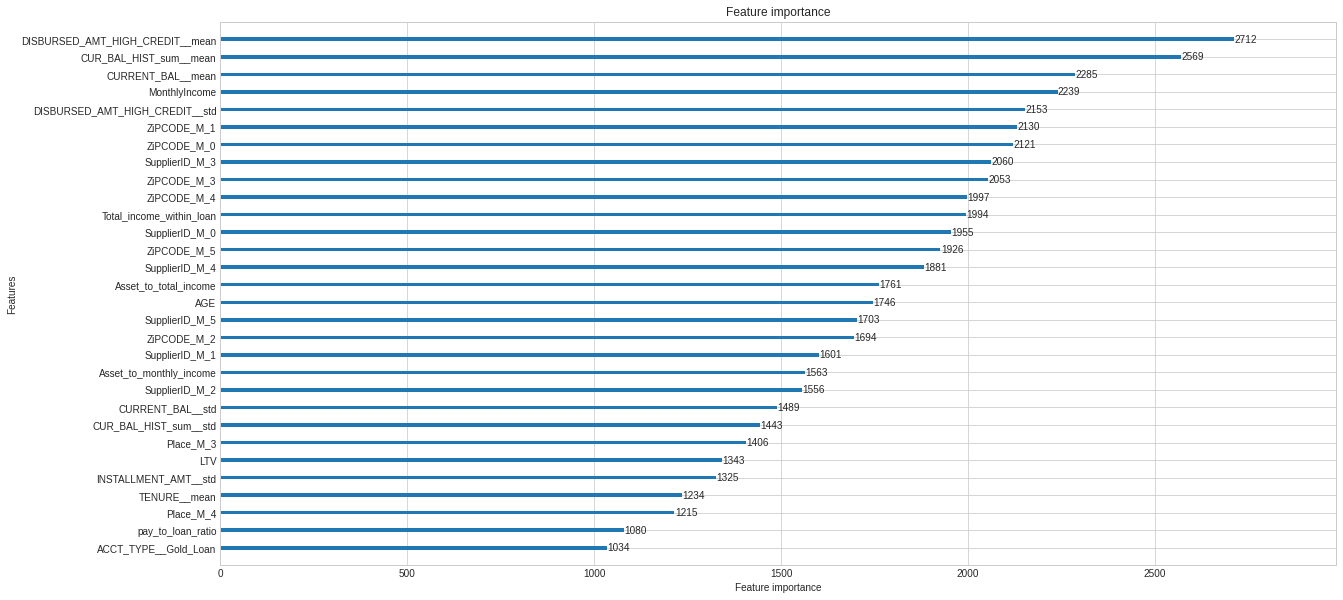

In [15]:
lgb.plot_importance(model,max_num_features=30,figsize=(20,10))

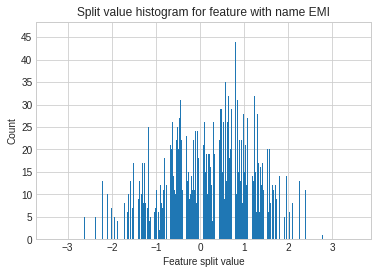

In [20]:
lgb.plot_split_value_histogram(model,feature='EMI');

<AxesSubplot:>

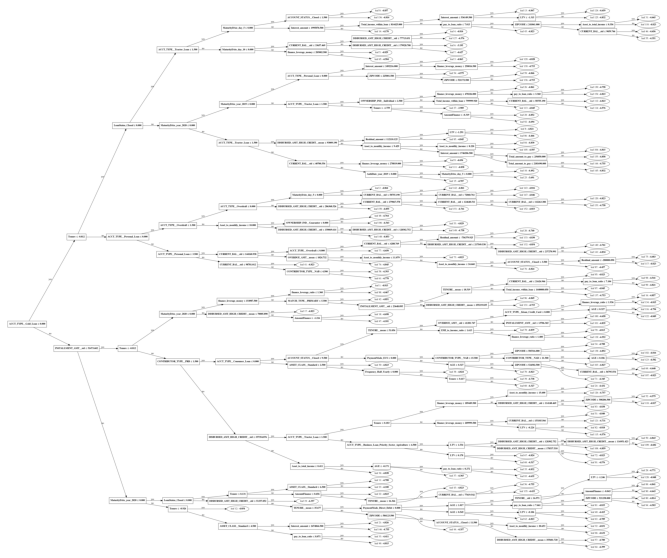

In [21]:
lgb.plot_tree(model,tree_index=1,figsize=(14,10))

# Bureau

In [2]:
train_br = pd.read_csv('input/train_bureau.csv')
test_br = pd.read_csv('input/test_bureau.csv')

In [23]:
train_br.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,...,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaN,...,NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaN,...,F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaN,...,NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21 00:00:00,...,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01 00:00:00,...,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN


In [24]:
hist_cols = ['AMT PAID - HIST', 'AMT OVERDUE - HIST','CUR BAL - HIST']
date_cols = ["DATE-REPORTED",'DISBURSED-DT','CLOSE-DT','LAST-PAYMENT-DATE','REPORTED DATE - HIST']

# Feature Engineering

In [4]:
df = pd.read_csv('input/train_folds.csv')

In [7]:
df.columns.values

array(['disbursa_months_outlier', 'Tenure_outlier', 'AssetCost_outlier',
       'AmountFinance_outlier', 'DisbursalAmount_outlier', 'EMI_outlier',
       'LTV_outlier', 'AGE_outlier', 'MonthlyIncome_outlier',
       'BranchID_M_0', 'BranchID_M_5', 'BranchID_M_3', 'BranchID_M_4',
       'BranchID_M_2', 'BranchID_M_1', 'Area_M_0', 'Area_M_5', 'Area_M_3',
       'Area_M_4', 'Area_M_2', 'Area_M_1', 'SupplierID_M_0',
       'SupplierID_M_5', 'SupplierID_M_3', 'SupplierID_M_4',
       'SupplierID_M_2', 'SupplierID_M_1', 'ZiPCODE_M_0', 'ZiPCODE_M_5',
       'ZiPCODE_M_3', 'ZiPCODE_M_4', 'ZiPCODE_M_2', 'ZiPCODE_M_1',
       'Place_M_0', 'Place_M_5', 'Place_M_3', 'Place_M_4', 'Place_M_2',
       'Place_M_1', 'AuthDate_day_2', 'AuthDate_day_3', 'AuthDate_day_4',
       'AuthDate_day_5', 'AuthDate_day_6', 'AuthDate_day_7',
       'AuthDate_day_8', 'AuthDate_day_9', 'AuthDate_day_10',
       'AuthDate_day_11', 'AuthDate_day_12', 'AuthDate_day_13',
       'AuthDate_day_14', 'AuthDate_day_15', 'Auth

In [55]:
cols = ['EMI_to_income_ratio', 'Total_amount_to_pay',
       'Total_income_within_loan', 'Interest_amount', 'Residual_amount',
       'Asset_to_total_income', 'Asset_to_monthly_income',
       'pay_to_loan_ratio', 'Finance_to_disbursed_ratio',
       'finance_leverage_money', 'finance_leverage_ratio',
       'processing_fees', 'disbursa_months', 'Tenure', 'AssetCost',
       'AmountFinance', 'DisbursalAmount', 'EMI', 'LTV', 'AGE',
       'MonthlyIncome',]

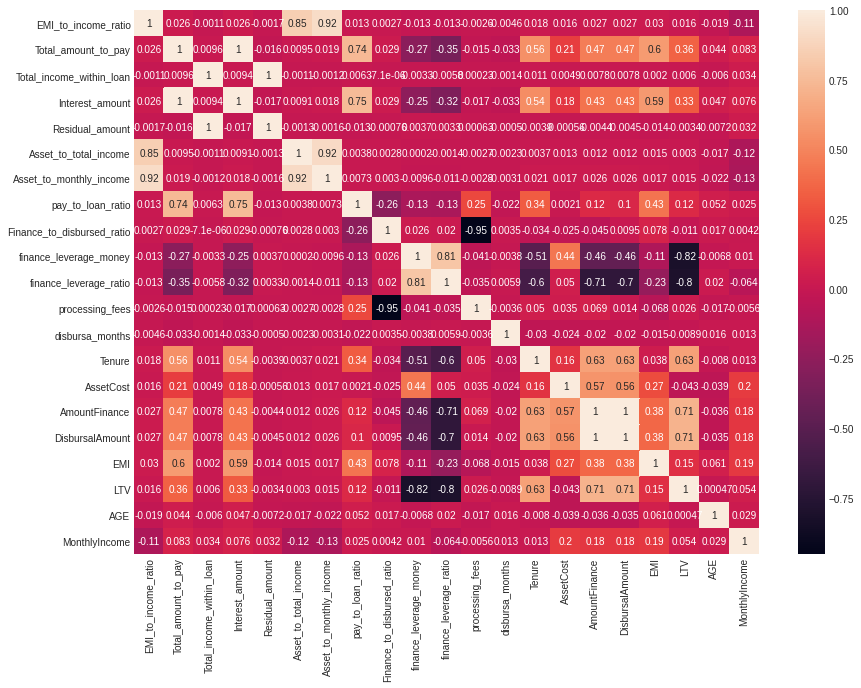

In [56]:
plt.figure(figsize=(14,10))
sns.heatmap(df[cols].corr(),annot=True);

In [27]:
cols = ['SELF-INDICATOR', 'MATCH_TYPE_PRIMARY', 'MATCH_TYPE_SECONDARY',
       'ACCT_TYPE_Auto_Loan_Personal_', 'ACCT_TYPE_Business_Loan_Secured',
       'ACCT_TYPE_Business_Loan_Against_Bank_Deposits',
       'ACCT_TYPE_Business_Loan_General',
       'ACCT_TYPE_Business_Loan_Priority_Sector_Agriculture',
       'ACCT_TYPE_Business_Loan_Priority_Sector_Others',
       'ACCT_TYPE_Business_Loan_Priority_Sector_Small_Business',
       'ACCT_TYPE_Business_Loan_Unsecured',
       'ACCT_TYPE_Business_Non_Funded_Credit_Facility_General',
       'ACCT_TYPE_Business_Non_Funded_Credit_Facility_Priority_Sector_Small_Business',
       'ACCT_TYPE_Business_Non_Funded_Credit_Facility_Priority_Sector_Agriculture',
       'ACCT_TYPE_Business_Non_Funded_Credit_Facility_Priority_Sector_Others',
       'ACCT_TYPE_Commercial_Equipment_Loan',
       'ACCT_TYPE_Commercial_Vehicle_Loan',
       'ACCT_TYPE_Construction_Equipment_Loan', 'ACCT_TYPE_Consumer_Loan',
       'ACCT_TYPE_Corporate_Credit_Card', 'ACCT_TYPE_Credit_Card',
       'ACCT_TYPE_Education_Loan', 'ACCT_TYPE_Fleet_Card',
       'ACCT_TYPE_Gold_Loan', 'ACCT_TYPE_Housing_Loan',
       'ACCT_TYPE_Individual', 'ACCT_TYPE_JLG_Group',
       'ACCT_TYPE_JLG_Individual', 'ACCT_TYPE_Kisan_Credit_Card',
       'ACCT_TYPE_Leasing', 'ACCT_TYPE_Loan_Against_Bank_Deposits',
       'ACCT_TYPE_Loan_Against_Shares_Securities',
       'ACCT_TYPE_Loan_on_Credit_Card', 'ACCT_TYPE_Loan_to_Professional',
       'ACCT_TYPE_Microfinance_Business_Loan',
       'ACCT_TYPE_Microfinance_Housing_Loan',
       'ACCT_TYPE_Microfinance_Others',
       'ACCT_TYPE_Microfinance_Personal_Loan',
       'ACCT_TYPE_Mudra_Loans_Shishu_Kishor_Tarun',
       'ACCT_TYPE_Non_Funded_Credit_Facility', 'ACCT_TYPE_Other',
       'ACCT_TYPE_Overdraft', 'ACCT_TYPE_Personal_Loan',
       'ACCT_TYPE_Pradhan_Mantri_Awas_Yojana_CLSS',
       'ACCT_TYPE_Prime_Minister_Jaan_Dhan_Yojana_Overdraft',
       'ACCT_TYPE_Property_Loan', 'ACCT_TYPE_SHG_Group',
       'ACCT_TYPE_SHG_Individual', 'ACCT_TYPE_Secured_Credit_Card',
       'ACCT_TYPE_Telco_Landline', 'ACCT_TYPE_Tractor_Loan',
       'ACCT_TYPE_Two_Wheeler_Loan', 'ACCT_TYPE_Used_Car_Loan',
       'CONTRIBUTOR_TYPE_ARC', 'CONTRIBUTOR_TYPE_CCC',
       'CONTRIBUTOR_TYPE_COP', 'CONTRIBUTOR_TYPE_FRB',
       'CONTRIBUTOR_TYPE_HFC', 'CONTRIBUTOR_TYPE_MFI',
       'CONTRIBUTOR_TYPE_NAB', 'CONTRIBUTOR_TYPE_NBF',
       'CONTRIBUTOR_TYPE_OFI', 'CONTRIBUTOR_TYPE_PRB',
       'CONTRIBUTOR_TYPE_RRB', 'CONTRIBUTOR_TYPE_SFB',
       'ACCOUNT_STATUS_Active', 'ACCOUNT_STATUS_Cancelled',
       'ACCOUNT_STATUS_Closed', 'ACCOUNT_STATUS_Delinquent',
       'ACCOUNT_STATUS_Restructured',
       'ACCOUNT_STATUS_SUIT_FILED_WILFUL_DEFAULT_',
       'ACCOUNT_STATUS_Settled', 'ACCOUNT_STATUS_Sold_Purchased',
       'ACCOUNT_STATUS_Suit_Filed', 'ACCOUNT_STATUS_WILFUL_DEFAULT',
       'ACCOUNT_STATUS_Written_Off', 'OWNERSHIP_IND_Guarantor',
       'OWNERSHIP_IND_Individual', 'OWNERSHIP_IND_Joint',
       'OWNERSHIP_IND_Primary', 'OWNERSHIP_IND_Supl_Card_Holder',
       'ASSET_CLASS_01', 'ASSET_CLASS_1', 'ASSET_CLASS_2',
       'ASSET_CLASS_Doubtful', 'ASSET_CLASS_Loss',
       'ASSET_CLASS_Special_Mention_Account', 'ASSET_CLASS_Standard',
       'ASSET_CLASS_SubStandard', 'INSTALLMENT_FREQUENCY_F01',
       'INSTALLMENT_FREQUENCY_F02', 'INSTALLMENT_FREQUENCY_F03',
       'INSTALLMENT_FREQUENCY_F04', 'INSTALLMENT_FREQUENCY_F05',
       'INSTALLMENT_FREQUENCY_F06', 'INSTALLMENT_FREQUENCY_F07',
       'INSTALLMENT_FREQUENCY_F08', 'INSTALLMENT_FREQUENCY_F10',]

In [28]:
len(cols)

98

In [5]:
cols = ['INSTALLMENT_AMT__mean', 'INSTALLMENT_AMT__std',
       'CREDIT_LIMIT_SANC_AMT__mean', 'CREDIT_LIMIT_SANC_AMT__std',
       'DISBURSED_AMT_HIGH_CREDIT__mean',
       'DISBURSED_AMT_HIGH_CREDIT__std', 'CURRENT_BAL__mean',
       'CURRENT_BAL__std', 'OVERDUE_AMT__mean', 'OVERDUE_AMT__std',
       'WRITE_OFF_AMT__mean', 'WRITE_OFF_AMT__std', 'TENURE__mean',
       'TENURE__std', 'AMT_PAID_HIST_sum__mean', 'AMT_PAID_HIST_sum__std',
       'AMT_OVERDUE_HIST_sum__mean', 'AMT_OVERDUE_HIST_sum__std',
       'CUR_BAL_HIST_sum__mean', 'CUR_BAL_HIST_sum__std']

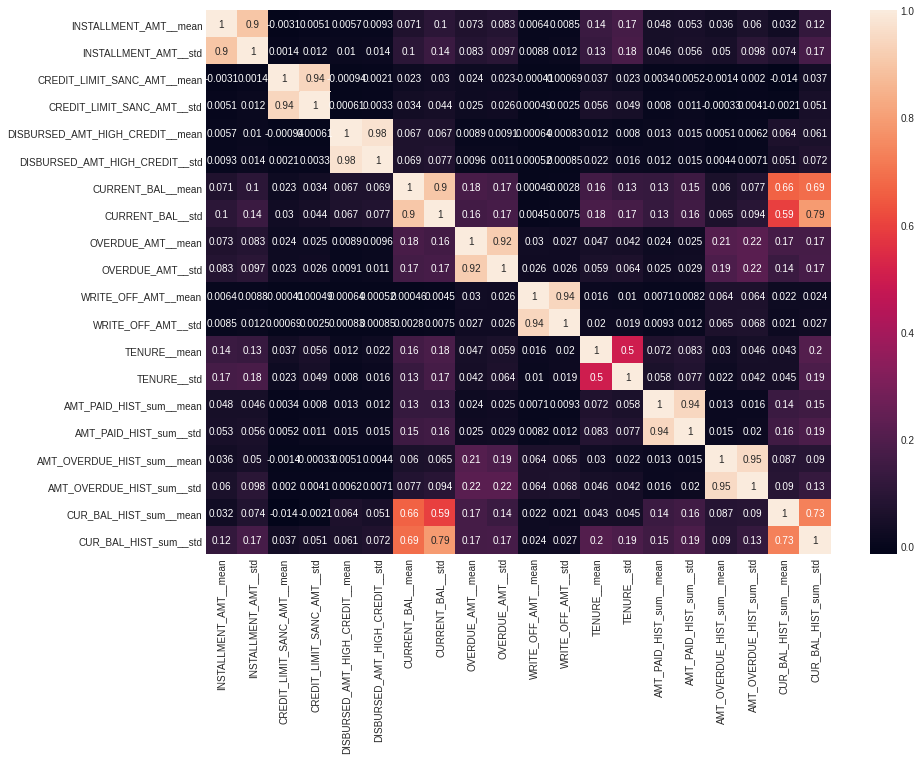

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(df[cols].corr(),annot=True);

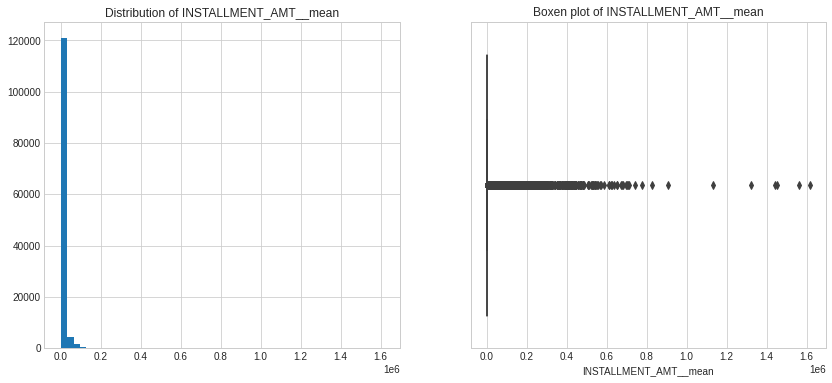

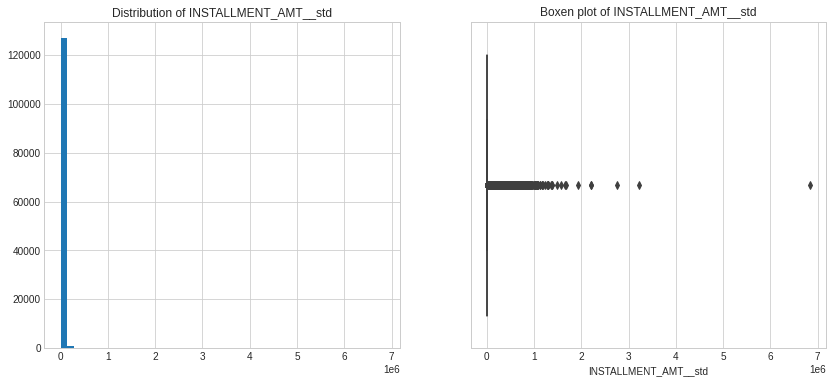

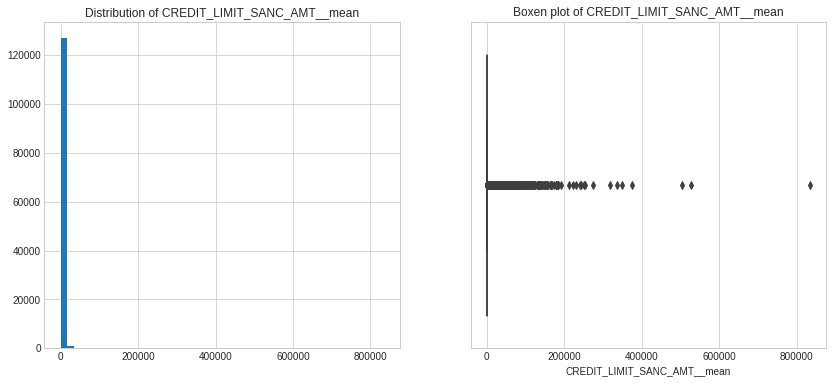

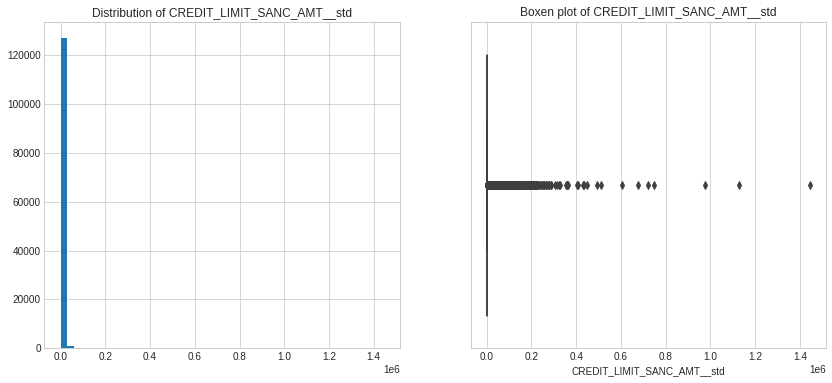

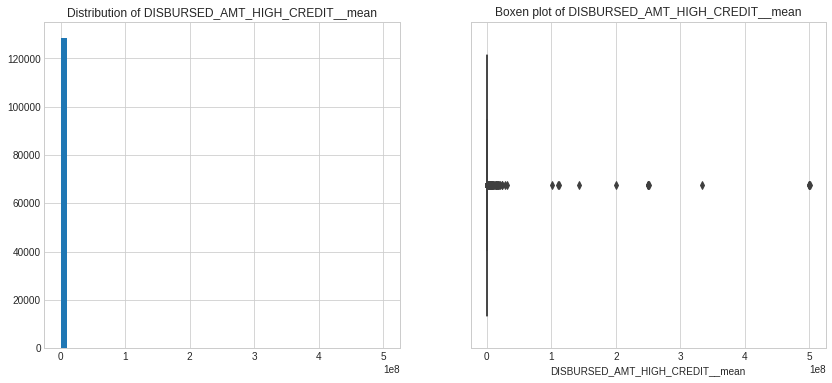

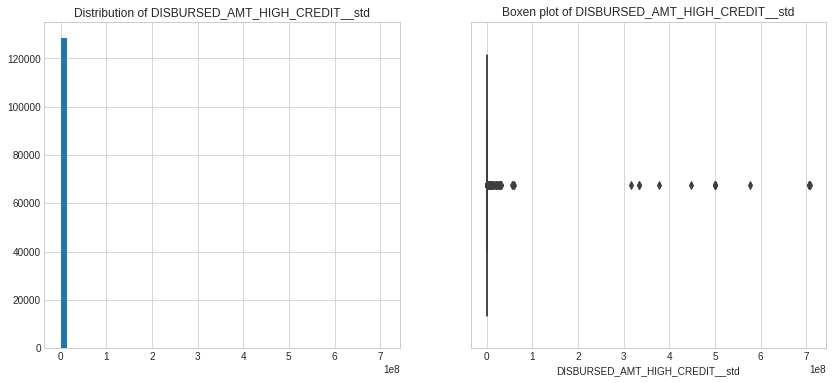

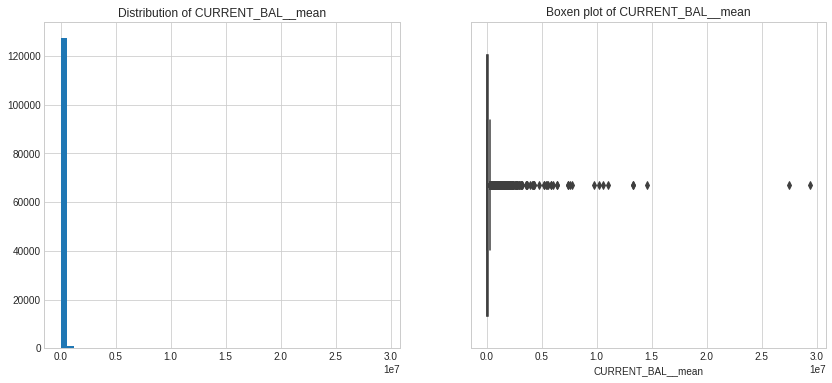

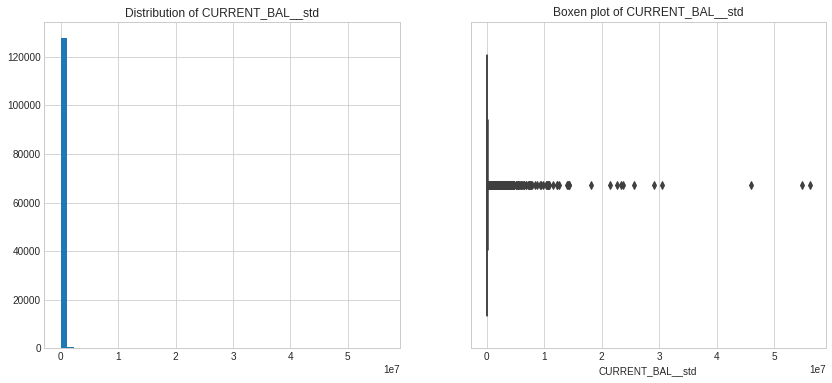

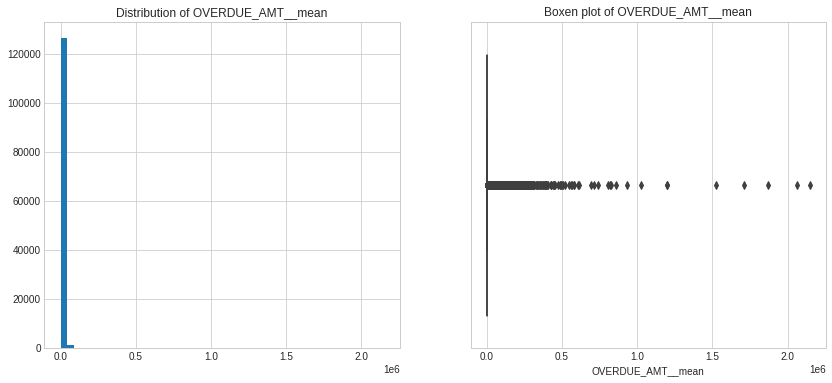

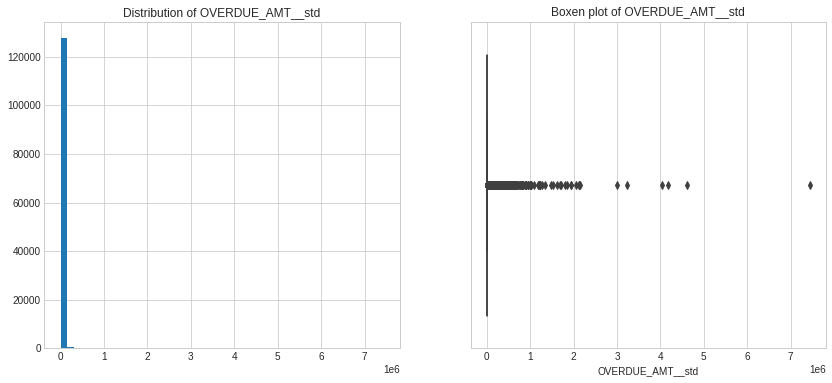

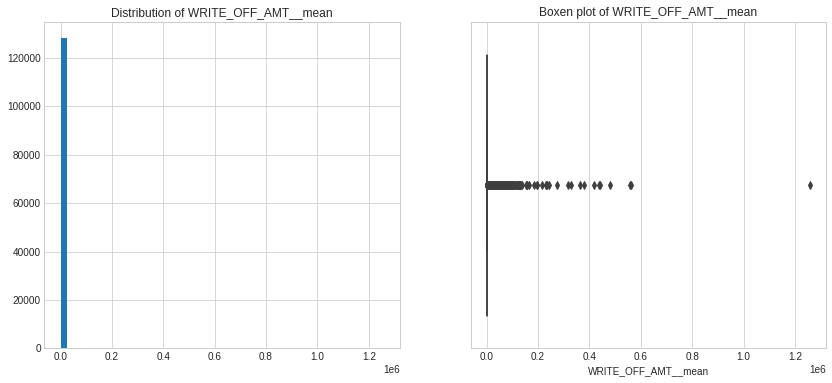

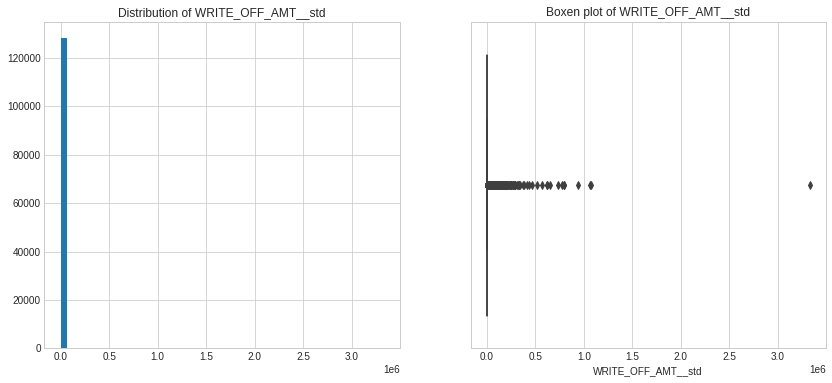

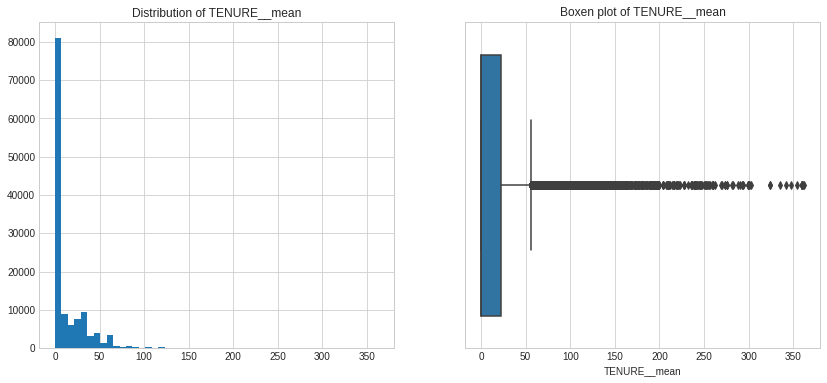

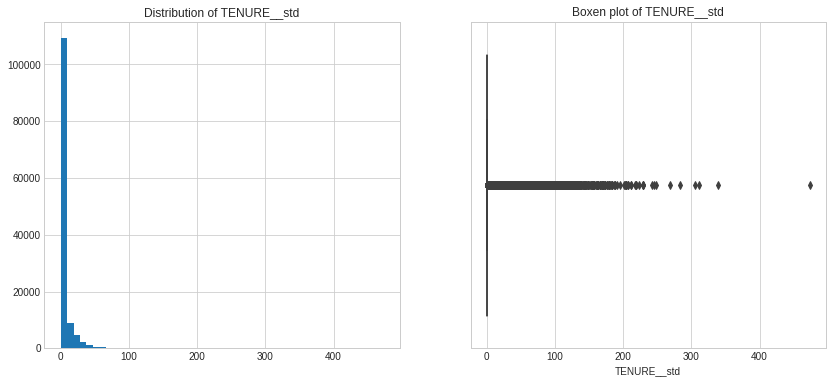

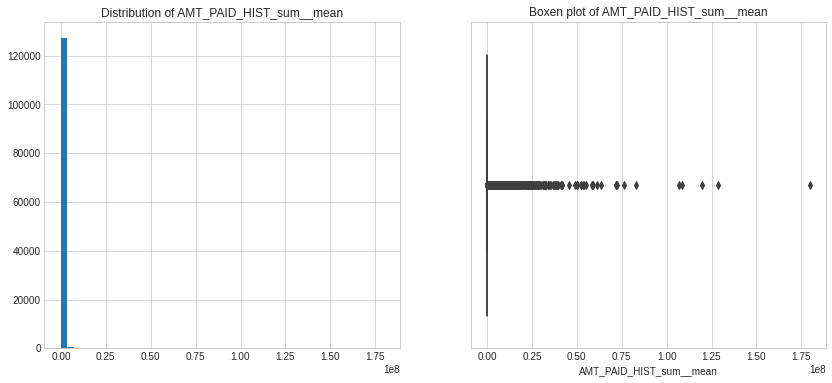

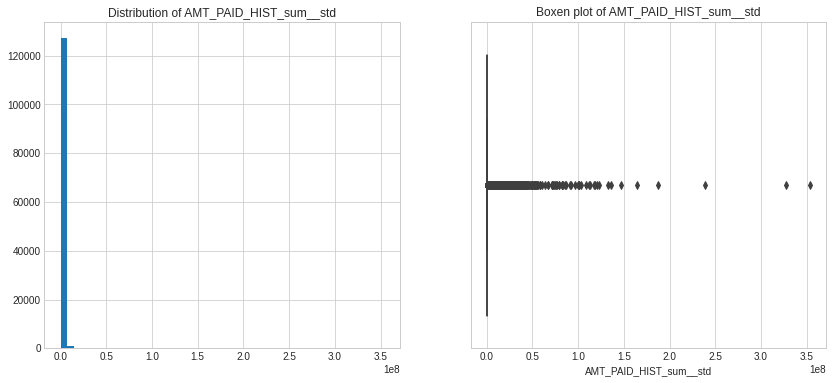

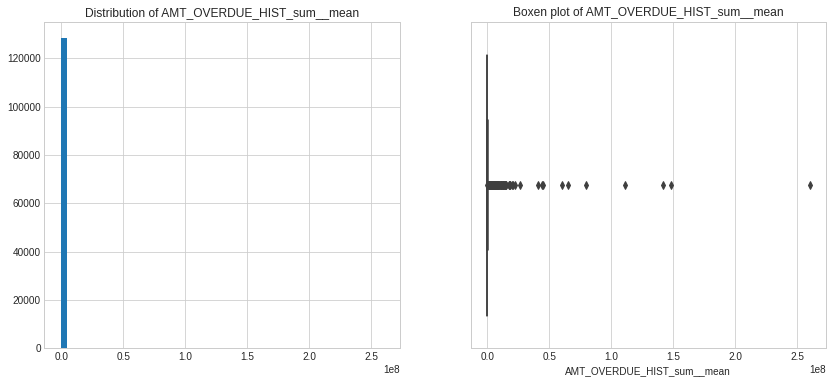

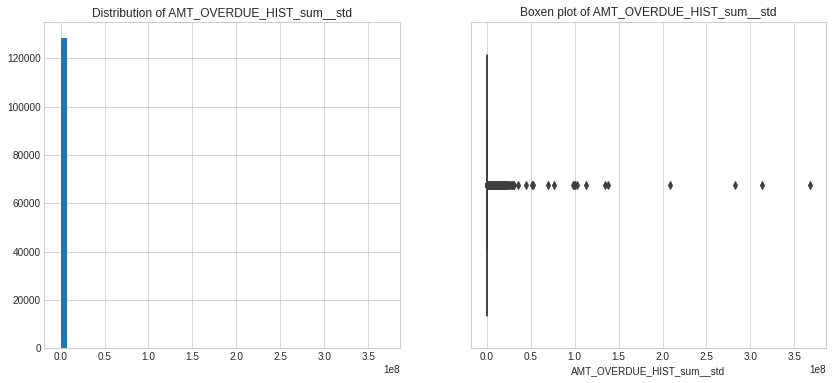

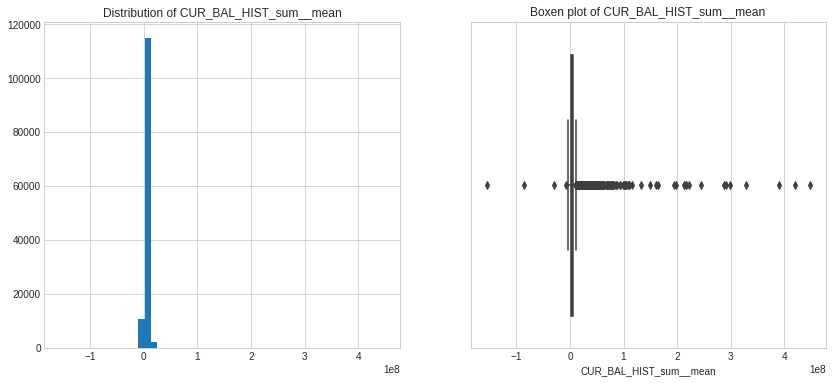

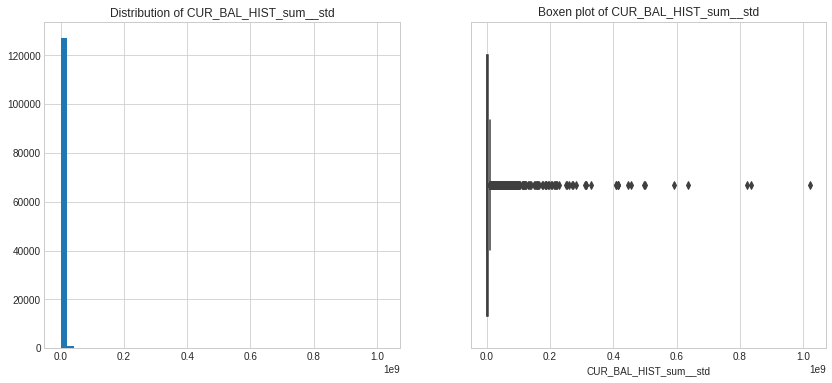

In [11]:
for col in cols:
    num_plot(df,col)

In [10]:
# Oversample with ADASYN
from imblearn.over_sampling import ADASYN

In [ ]:
drop_col = ["ID", "kfold", "Top-up Month"]

In [ ]:
df = pd.read_csv('input/train_folds.csv')

In [ ]:
X = df.drop(drop_col,axis=1)
y = df['Top-up Month']

In [ ]:
df['Top-up Month'].value_counts()

In [ ]:
v = X.isnull().sum().sort_values(ascending=False)
v

In [ ]:
X = X.fillna(0)

In [ ]:
st = {0:20000,1:20000,2:20000,3:20000,4:20000,5:20000,6:126677}
oversample = ADASYN(sampling_strategy=st,random_state=42,n_neighbors=5)
X, y = oversample.fit_resample(X, y)

In [ ]:
X1 = X.reset_index().rename(columns={'index':"ID"})

X1['Top-up Month'] = y

In [ ]:
from sklearn import model_selection

In [ ]:
def create_folds(df,save_file='train_folds'):
    df["kfold"] = -1

    df = df.sample(frac=1).reset_index(drop=True)

    # kfold
    kfold= 3
    kf = model_selection.KFold(n_splits=kfold, shuffle=True, random_state=42)
    for fold, (train_idx, val_idx) in enumerate(kf.split(X=df)):
        print(len(train_idx), len(val_idx))
        df.loc[val_idx, "kfold"] = fold

    print("Final shape of file:", df.shape)
    df.to_csv(f"input/{save_file}.csv", index=False)

In [ ]:
# create_folds(X1)

In [16]:
pwd

'/home/sudhir/Downloads/kaggle/ltfs-data-science-finhack'

# Performance

In [2]:
from src.skmetrics import classifier_result

In [3]:
pred = pd.read_csv('model_preds/lgbm_pred.csv')
pred.head()

,ID,kfold,Top-up Month,Top-up Month_pred0,Top-up Month_pred1,Top-up Month_pred2,Top-up Month_pred3,Top-up Month_pred4,Top-up Month_pred5,Top-up Month_pred6
0,72664,0,3,0.124809,0.001720,0.000100,0.002365,0.001497,0.028672,0.840837
1,879,0,6,0.000505,0.000029,0.017042,0.000111,0.000163,0.051050,0.931100
2,121570,0,6,0.001683,0.000070,0.000466,0.168786,0.000516,0.000385,0.828094
3,24453,0,6,0.000533,0.000034,0.000049,0.072275,0.017291,0.000066,0.909752
4,32180,0,6,0.061625,0.000024,0.002643,0.000057,0.000104,0.004380,0.931166


In [5]:
pred.columns

Index(['ID', 'kfold', 'Top-up Month', 'Top-up Month_pred0',
       'Top-up Month_pred1', 'Top-up Month_pred2', 'Top-up Month_pred3',
       'Top-up Month_pred4', 'Top-up Month_pred5', 'Top-up Month_pred6'],
      dtype='object')

In [7]:
all_f1 = []
for i in range(3):
    y=pred.query(f'kfold=={i}')['Top-up Month']
    cols = ['Top-up Month_pred0','Top-up Month_pred1', 'Top-up Month_pred2', 'Top-up Month_pred3',
           'Top-up Month_pred4', 'Top-up Month_pred5', 'Top-up Month_pred6']
    y_prob = pred.query(f'kfold=={i}')[cols]
    y_pred =y_prob.values.argmax(axis=1).reshape(-1,1)
    print(f'K Fold {i}','-'*20)
    f1,_ = classifier_result(y, y_pred, y_prob,printf=True)
    all_f1.append(f1)

K Fold 0 --------------------

        'None'
        Area Under the Curve (AUC)	: 0.9645
        Test dataset Absolute Accuracy	: 88.0 %
        Log Loss	: 0.3279
        F1 score	: 0.5635145906264859

        ---------------------
        Classification Report :
               precision    recall  f1-score   support

           0       0.69      0.55      0.61      2789
           1       0.60      0.34      0.44       345
           2       0.68      0.41      0.51       789
           3       0.69      0.42      0.53      1164
           4       0.71      0.36      0.47      1020
           5       0.66      0.33      0.44      1219
           6       0.91      0.98      0.94     35559

    accuracy                           0.88     42885
   macro avg       0.71      0.48      0.56     42885
weighted avg       0.87      0.88      0.87     42885

        Confusion Matrix :
 [[ 1536     8     3     0     1    19  1222]
 [   17   118    14     7     2     8   179]
 [   24     5   323

In [8]:
# averate f1 score
np.mean(f1)

0.5623017923996707

# Done